## Creating a data model 

In this notebook we will create and apply a new **data model/schema** to a raw `.imma` file, using the [mdf_reader](https://git.noc.ac.uk/iregon/mdf_reader) tool. We will add supplemental metadata to the basic `imma1` data model and display supplemental data as a pandas dataframe. 

Lets first import all the tools that we will need. 

In [1]:
import os
import sys
sys.path.append('/home/bea/')
import mdf_reader
import json

2020-12-10 10:11:36,906 - root - INFO - init basic configure of logging success


The `mdf_reader` tool comes with data model templates of `.json` files, that we can use to build our models. For more information see the following [manual](https://git.noc.ac.uk/iregon/mdf_reader/-/blob/master/docs/User_manual.docx).

In [2]:
path_to_data_models = '/home/bea/c3s_work/mdf_reader/data_models/lib/'

template_names = mdf_reader.schemas.templates()
template_names

['fixed_width_complex_exc',
 'delimited_sections',
 'delimited_basic',
 'fixed_width_complex_opt',
 'fixed_width_sections',
 'fixed_width_basic']

According to the manual, ICOADS data stored with the [IMMA format](https://icoads.noaa.gov/e-doc/imma/R3.0-imma1.pdf) represents a complex data model, since the data includes blocks of sections which are exclusive to certain DCK's (e.g. data coming from the NOAA National Climatic Data Center (NCDC) TD-11 formats). Most of the ICOADS data however will need a **schema** based on the `imma1.json` format, which is based on the template: `*_complex_opt.json`.

Lets try to build our own **schema** based on this template for a new dck. In this notebook we will organise the data and metadata from the **US Maury collection** that corresponds to `source/dck 069-701`.

1. First lets read a raw `.imma` file from dck 701 as an example, for a subset of the data collected in April/1845. 

In [3]:
schema = 'imma1'

data_file_path = '/home/bea/c3s_work/mdf_reader/tests/data/069-701_1845-04_subset.imma'

data_raw = mdf_reader.read(data_file_path, data_model = schema)

2020-12-10 10:11:38,691 - root - INFO - READING DATA MODEL SCHEMA FILE...
2020-12-10 10:11:38,702 - root - INFO - EXTRACTING DATA FROM MODEL: imma1
2020-12-10 10:11:38,704 - root - INFO - Getting data string from source...
2020-12-10 10:11:38,731 - root - INFO - Extracting and reading sections
2020-12-10 10:11:38,737 - root - INFO - Processing section partitioning threads
2020-12-10 10:11:38,740 - root - INFO - 1000 ...
2020-12-10 10:11:38,825 - root - INFO - done
2020-12-10 10:11:38,827 - root - INFO - 211000 ...
2020-12-10 10:11:38,907 - root - INFO - done
2020-12-10 10:11:38,908 - root - INFO - 29211000 ...
2020-12-10 10:11:38,972 - root - INFO - done
2020-12-10 10:11:38,973 - root - INFO - 2929211000 ...
2020-12-10 10:11:38,985 - root - INFO - done


Reading section core
Reading section c1
Reading section c5
Reading section c6
Reading section c7
Reading section c8
Reading section c9
Reading section c95
Reading section c96
Reading section c97
Reading section c98


2020-12-10 10:11:41,663 - root - WARNING - Data numeric elements with missing upper or lower threshold: ('c1', 'BSI'),('c1', 'AQZ'),('c1', 'AQA'),('c1', 'UQZ'),('c1', 'UQA'),('c1', 'VQZ'),('c1', 'VQA'),('c1', 'PQZ'),('c1', 'PQA'),('c1', 'DQZ'),('c1', 'DQA'),('c5', 'OS'),('c5', 'OP'),('c5', 'FM'),('c5', 'IMMV'),('c5', 'IX'),('c5', 'W2'),('c5', 'WMI'),('c5', 'SD2'),('c5', 'SP2'),('c5', 'IS'),('c5', 'RS'),('c5', 'IC1'),('c5', 'IC2'),('c5', 'IC3'),('c5', 'IC4'),('c5', 'IC5'),('c5', 'IR'),('c5', 'RRR'),('c5', 'TR'),('c5', 'NU'),('c5', 'QCI'),('c5', 'QI1'),('c5', 'QI2'),('c5', 'QI3'),('c5', 'QI4'),('c5', 'QI5'),('c5', 'QI6'),('c5', 'QI7'),('c5', 'QI8'),('c5', 'QI9'),('c5', 'QI10'),('c5', 'QI11'),('c5', 'QI12'),('c5', 'QI13'),('c5', 'QI14'),('c5', 'QI15'),('c5', 'QI16'),('c5', 'QI17'),('c5', 'QI18'),('c5', 'QI19'),('c5', 'QI20'),('c5', 'QI21'),('c5', 'QI22'),('c5', 'QI23'),('c5', 'QI24'),('c5', 'QI25'),('c5', 'QI26'),('c5', 'QI27'),('c5', 'QI28'),('c5', 'QI29'),('c5', 'RHI'),('c5', 'AWSI'),('

Reading section c99


2020-12-10 10:11:47,198 - root - INFO - Wrapping output....
2020-12-10 10:11:47,820 - root - INFO - CREATING OUTPUT DATA ATTRIBUTES FROM DATA MODEL


In [4]:
data_raw.data['c99']

c99
0     99 0 300850118450401  5404N 2354W             ...
1     99 0 810348118450401  4836N 2330W             ...
2     99 0 370731118450401  4643N15147W             ...
3     99 0 260597118450401  4454N 3015W             ...
4     99 0 250661118450401  4356N 2220W             ...
5     99 0 210803118450401  4311N 3936W             ...
6     99 0 200280118450401  4221N 6524W             ...
7     99 0 780477118450401  4123N 4554W             ...
8     99 0 780253118450401  3753N 7340W             ...
9     99 0 870009118450401  3720N 7346W             ...
10    99 0 130116118450401  3650N                   ...
11    99 0 250791118450401  3620N16445W             ...
12    99 0 730765118450401  3521N 5940W             ...
13    99 0 350695118450401  3514N15506E             ...
14    99 0 860756118450401  3443N16036W             ...
15    99 0 220807118450401  3411N     E             ...
16    99 0 370279118450401  3315N17945W             ...
17    99 0 420271118450401  3030N 6638W             ...
18    99 0 780545118450401  2940N 7945W       10300 ...
19    99 0 740832118450401  2832N 1612W             ...
20    99 0 350731118450401  2810N 7254W             ...
21    99 0 780005118450401  2800N16002W             ...
22    99 0 760672118450401  2751N17814W             ...
23    99 0 090323118450401  2719N 2208W             ...
24    99 0 210767118450401  2632N 3451W             ...
25    99 0 260564118450401  2557N17625E             ...
26    99 0 760474118450401  2552N 6510W             ...
27    99 0 780288118450401  2449N                   ...
28    99 0 400600118450401      N     W             ...
29    99 0 130004118450401  2350N16140W             ...
...                                                 ...
3656  99 0 200238118450430  1558S 3058W             ...
3657  99 0 370089118450430  1629S 3028W             ...
3658  99 0 220364118450430  1700S 7512W             ...
3659  99 0 180453118450430  1742S15648W             ...
3660  99 0 130626118450430  2228S10950E             ...
3661  99 0 340310118450430  2312S11030E             ...
3662  99 0 830130118450430  2454S  442E             ...
3663  99 0 760484118450430  2512S  300W             ...
3664  99 0 400706118450430  2626S 5502E             ...
3665  99 0 200360118450430  2701S  840E             ...
3666  99 0 180254118450430  2711S  312E             ...
3667  99 0 090235118450430  2733S 3226W             ...
3668  99 0 800105118450430  2748S 2905W             ...
3669  99 0 220774118450430      S     E             ...
3670  99 0 780336118450430  3122S 4950W             ...
3671  99 0 190828118450430  3329S 1603E             ...
3672  99 0 280269118450430  3500S17437E             ...
3673  99 0 830234118450430  3617S 7651WW      10100 ...
3674  99 0 100106118450430  3707S 5031W             ...
3675  99 0 370187118450430  3817S  205E             ...
3676  99 0 250459118450430  3828S  111E             ...
3677  99 0 810274118450430  3951S12759W             ...
3678  99 0 330362118450430  4011S 8240W             ...
3679  99 0 790099118450430  4307S                   ...
3680  99 0 340809118450430  4405S 5031W             ...
3681  99 0 130088118450430  4737S                   ...
3682  99 0 060598118450430  5444S 9045W             ...
3683  99 0 260061118450430  5619S 6744W             ...
3684  99 0 350904118450430  5620S 7159W             ...
3685  99 0 180361118450431  2940N 6403W             ...

[3686 rows x 1 columns]

The `c99` column is a bit messy. Here, we will need to separate the Suplememal Metadata ingestied in ICOADS as an entire string and sort each row out according to the source&dck documentation. 

2. We then need to make a new data model or **schema** to be stored in the library folder of the `mdf_reader`. For this we create a folder with the name `imma1_d701` in the lib directory.
3. Under this folder (`/data_models/lib/imma1_d701`) we will need to add a `.json` file with the same name. This `imma1_d701.json` file will contain all the data model information with instructions on how to subdivide the metadata added to `c99`. The name of the file is `imma1_d701.json` because the data model for this deck is based on the `imma1` template shown above, but the `c99` will be further subdivided into other columns/sections. 

In [5]:
path_to_folder = '/home/bea/c3s_work/mdf_reader/data_models/lib/'
model_name = 'imma1_d701'
model_path = os.path.join(path_to_folder, model_name)
model_path

'/home/bea/c3s_work/mdf_reader/data_models/lib/imma1_d701'

> Uncomment the following lines to create new data models. This folder is already withing the repository so you dont need to run the lines below. They only serve as a guide for further schemas

In [6]:
# if not os.path.exists(model_path):
#     os.makedirs(model_path)

In that path we will copy the template that we will based our **schema** from. In this case the `imma1` schema.

In [7]:
# import shutil
# shutil.copyfile(os.path.join(path_to_folder, 'imma1/imma1.json'),  os.path.join(model_path, model_name+'.json'))

Now we need to make a directory called `code_tables` and copy all `code_tables` from the `imma1` folder template

In [8]:
# import shutil
# shutil.copytree(os.path.join(path_to_folder, 'imma1/code_tables'), os.path.join(model_path,'code_tables'))

We end up with something like this: 

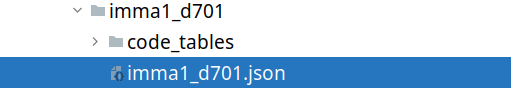

In [9]:
from IPython.display import Image
Image(filename='/home/bea/c3s_work/figures/deckschema.png')

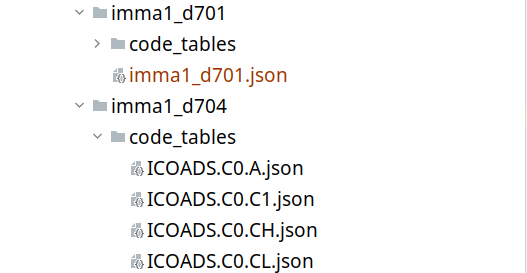

In [10]:
from IPython.display import Image
Image(filename='/home/bea/c3s_work/figures/code_tables_schema_one.png')

Now the key will be to modify the `c99` section of the `imma1_d701.json`. See the highlighted text in the figure below. 

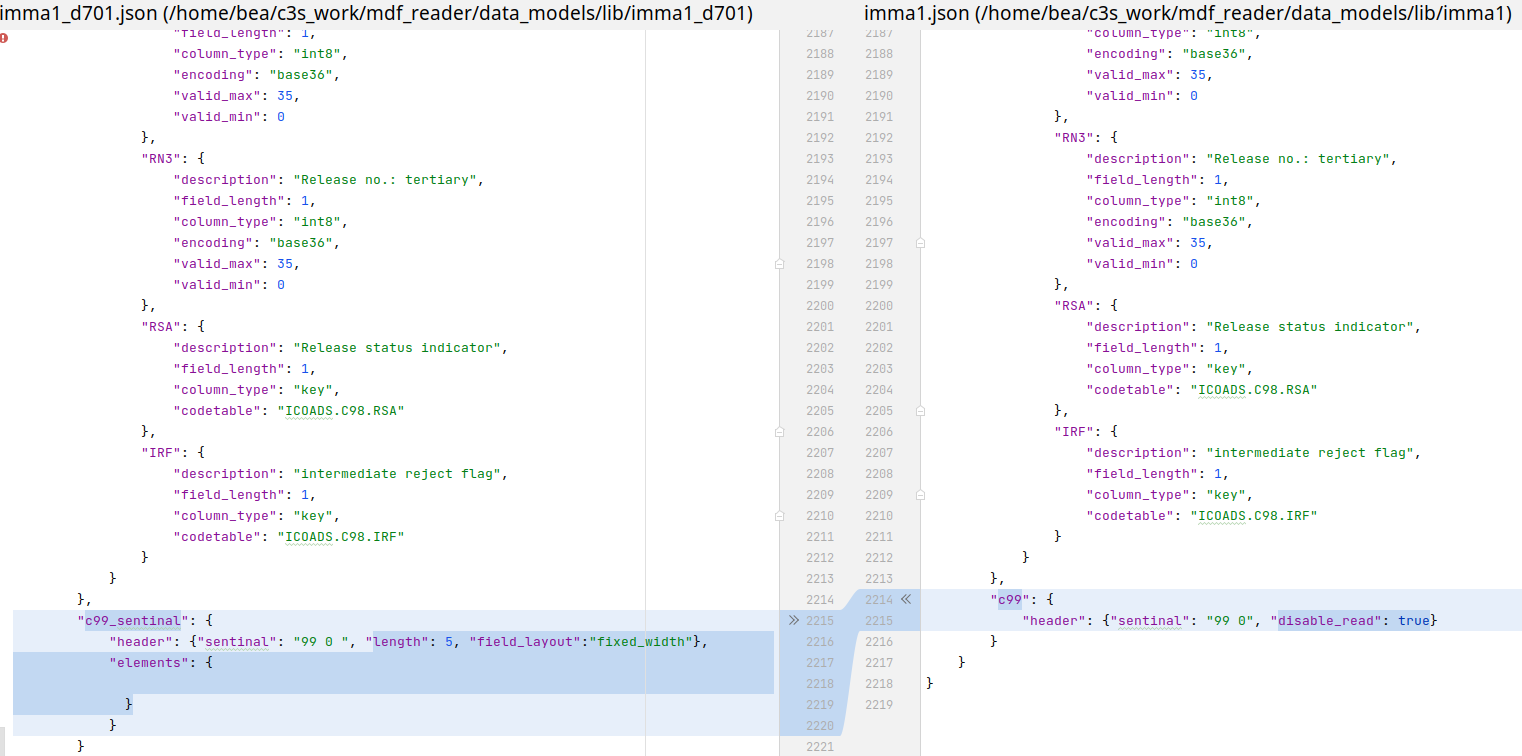

In [11]:
from IPython.display import Image
Image(filename='/home/bea/c3s_work/figures/c99differences.png')

The `c99_sentinal` section identifies where in the data, we will have a new section. In this case we will have a new section corresponding to Supplemental Metadata. 

In our example this supplemental metadata will come from the documentation of the US Maury collection stored in the [ICOADS website](https://icoads.noaa.gov/e-doc/other/transpec/maury/maury_transpec). 

4. We will need to add the metadata information from the website inside that `c99_sentinal` section and create as many sections as the data requires.

>sentinal: section identifier
applies to: format.fixed_width
is mandatory: it is not mandatory if the section is unique, unique in a parsing_order block, or
part of a sequential parsing_order block.
type: string
comments: the element bearing the sentinal needs to be, additionally, declared in the
elements block


5. We will have to build additional `.json` files to be saved under the `code_tables` folder of our schema. Each `.json` file inside the `code_tables` are dictionaries that will help decode metadata observations (e.g. wind force scales or weather codes).  For each encoded variable that we add, we will need to add a new `ICOADS.C99_Variable.json` to the **schema**. Files need to be named after the section that they represent, in this case `ICOADS.C99_Variable.json`. See images below:

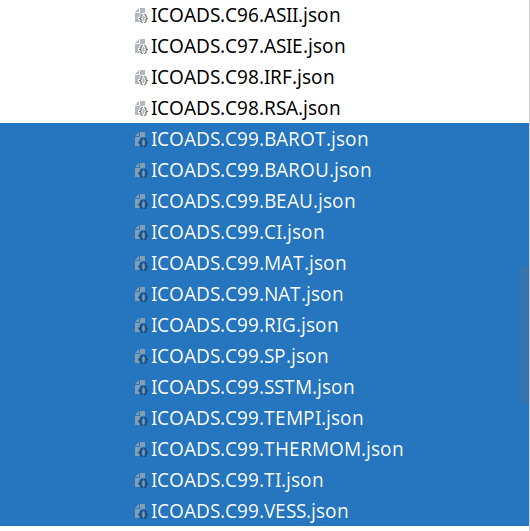

In [12]:
Image(filename='/home/bea/c3s_work/figures/code_tables_schema_two.png')

From the US Maury collection [ICOADS documentation](https://icoads.noaa.gov/e-doc/other/transpec/maury/maury_transpec), we find out that the `c99` for this deck is compose of the following sections:

- Data
- Header information
- Quality control information (qc)

```
Data stored in the supplemental attachment consisted of the entire data record
(173 characters); followed by a selection of fields from, or derived from, the
associated header record (through character 241); and selected fields from the
qc file (total 250 characters):
  # Pos.     Total #  Field  Record
    range    of pos.   name    type  Description of field (of derived field)
--- -------  -------  -----  ------  ----------------------------------------
  1 1-7         7     cvoyd    data  voyage number
... ...               ...       ...  ...
 47 172-173     2     cmvq     data  magnetic variation QC indicator
 NA 174-175     2     cts2   header  (fr ship type, ctship, according to [5])
  4 176-177     2     cft    header  form type
  5 178-193    16     comm   header  commander (first 16 positions only) [6]
  6 194-217    24     cfr    header  from city
  7 218-241    24     cto    header  to city
  2 242-246     5     qc2    qc      reel sequence number
  5 247-248     2     qc5    qc      day  (local time) (99 indicates missing)
  6 249-250     2     qc6*   qc      hour (local time) (99 indicates missing)
--- -------  -------  -----  ------  ----------------------------------------
* Whenever qc6 was 24, zero was inadvertently written out to the supplemental
attachment.  This resulted from an error in the conversion program, but can
be fixed by interpretation of hour zero as hour 24 of qc5 + 1 (as noted in [2],
qc6 originally ranged 1-24, with 24 signifying hour 0 of the next day.  As
intended, qc5 was included in the supplementary attachment in original form.
```

In the raw data file the information looks like this: 

In [13]:
c99 = data_raw.data['c99']
line = c99.iloc[63] 

In [14]:
line.values[0]

'99 0 400706118450401   240S 9513ESE     757                                                                 NTW    51 SEXS   50 SW     50                                          201J.S.KIMBALL     SUMATRA                 BOSTON                  20204 199'

We then need to divide all this string accoding to the documentation above and the format of the data specified in the [US Maury data docs](https://icoads.noaa.gov/e-doc/other/transpec/maury/maury_format)

In [15]:
#sentinal = 5
part_1 = line.values[0][0:5]
part_1

'99 0 '

In [16]:
# cvoyd voyage number = 7
part_2 = line.values[0][5:5+7]
part_2

'4007061'

In [17]:
# date = 10
part_3 = line.values[0][12:12+10]
part_3

'18450401  '

6. We build our `.json` file reflecting each data field from the ICOADS documentation as a new section. And add each parameter from the data as a new element. Having a `sentinal` section at the beginning of the `c99` is important since in the `.imma` format, regardless of the source/dck, will have 5 characters that will always be the same. 

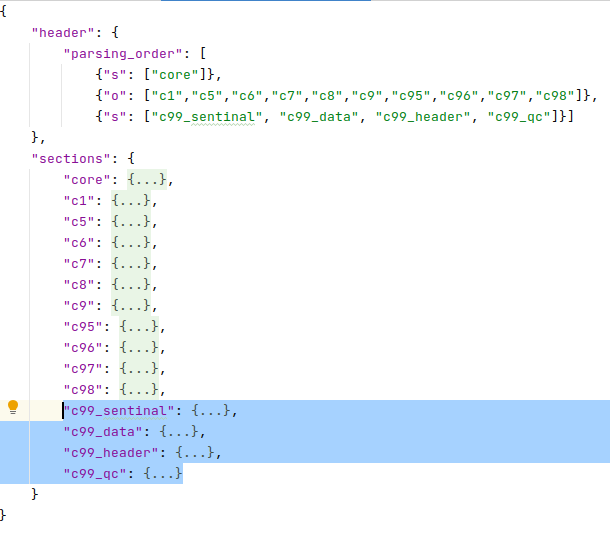

In [18]:
Image(filename='/home/bea/c3s_work/figures/new_schema.png')

To each section we add the corresponding elements/parameters. 

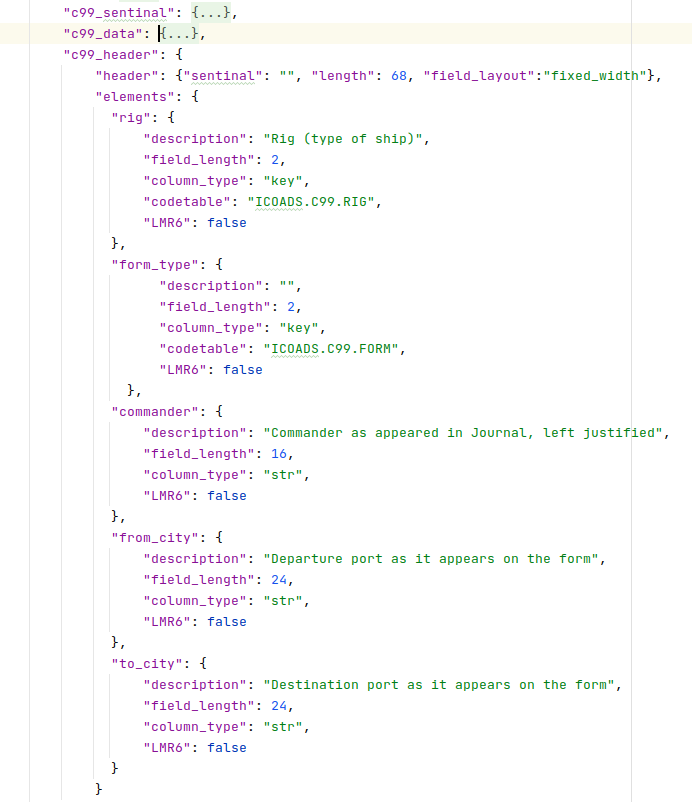

In [19]:
Image(filename='/home/bea/c3s_work/figures/elements.png')

Now we feed this new data model to the `mdf_reader.read` function. It is important that we save this data model under the right directory

In [20]:
model_path

'/home/bea/c3s_work/mdf_reader/data_models/lib/imma1_d701'

In [21]:
data_file_path = '/home/bea/c3s_work/mdf_reader/tests/data/069-701_1845-04_subset.imma'

data = mdf_reader.read(data_file_path, data_model_path= model_path)

2020-12-10 10:17:41,871 - root - INFO - READING DATA MODEL SCHEMA FILE...
2020-12-10 10:17:41,877 - root - INFO - EXTRACTING DATA FROM MODEL: /home/bea/c3s_work/mdf_reader/data_models/lib/imma1_d701
2020-12-10 10:17:41,880 - root - INFO - Getting data string from source...
2020-12-10 10:17:41,916 - root - INFO - Extracting and reading sections
2020-12-10 10:17:41,918 - root - INFO - Processing section partitioning threads
2020-12-10 10:17:41,919 - root - INFO - 1000 ...
2020-12-10 10:17:41,966 - root - INFO - done
2020-12-10 10:17:41,972 - root - INFO - 211000 ...
2020-12-10 10:17:42,038 - root - INFO - done
2020-12-10 10:17:42,039 - root - INFO - 29211000 ...
2020-12-10 10:17:42,096 - root - INFO - done
2020-12-10 10:17:42,099 - root - INFO - 3029211000 ...
2020-12-10 10:17:42,109 - root - INFO - done
2020-12-10 10:17:42,113 - root - INFO - 303029211000 ...
2020-12-10 10:17:42,138 - root - INFO - done
2020-12-10 10:17:42,139 - root - INFO - 30303029211000 ...
2020-12-10 10:17:42,158 -

Reading section core
Reading section c1
Reading section c5
Reading section c6
Reading section c7
Reading section c8
Reading section c9
Reading section c95
Reading section c96
Reading section c97
Reading section c98
Reading section c99_sentinal
Reading section c99_data
Reading section c99_header
Reading section c99_qc


2020-12-10 10:17:46,149 - root - WARNING - Data numeric elements with missing upper or lower threshold: ('c1', 'BSI'),('c1', 'AQZ'),('c1', 'AQA'),('c1', 'UQZ'),('c1', 'UQA'),('c1', 'VQZ'),('c1', 'VQA'),('c1', 'PQZ'),('c1', 'PQA'),('c1', 'DQZ'),('c1', 'DQA'),('c5', 'OS'),('c5', 'OP'),('c5', 'FM'),('c5', 'IMMV'),('c5', 'IX'),('c5', 'W2'),('c5', 'WMI'),('c5', 'SD2'),('c5', 'SP2'),('c5', 'IS'),('c5', 'RS'),('c5', 'IC1'),('c5', 'IC2'),('c5', 'IC3'),('c5', 'IC4'),('c5', 'IC5'),('c5', 'IR'),('c5', 'RRR'),('c5', 'TR'),('c5', 'NU'),('c5', 'QCI'),('c5', 'QI1'),('c5', 'QI2'),('c5', 'QI3'),('c5', 'QI4'),('c5', 'QI5'),('c5', 'QI6'),('c5', 'QI7'),('c5', 'QI8'),('c5', 'QI9'),('c5', 'QI10'),('c5', 'QI11'),('c5', 'QI12'),('c5', 'QI13'),('c5', 'QI14'),('c5', 'QI15'),('c5', 'QI16'),('c5', 'QI17'),('c5', 'QI18'),('c5', 'QI19'),('c5', 'QI20'),('c5', 'QI21'),('c5', 'QI22'),('c5', 'QI23'),('c5', 'QI24'),('c5', 'QI25'),('c5', 'QI26'),('c5', 'QI27'),('c5', 'QI28'),('c5', 'QI29'),('c5', 'RHI'),('c5', 'AWSI'),('

And magically all the messy string is separated! 

In [22]:
import pandas as pd
pd.options.display.max_columns = None
data.data[["c99_sentinal"]].head()

c99_sentinal          
          ATTI ATTL  BLK
0           99    0  NaN
1           99    0  NaN
2           99    0  NaN
3           99    0  NaN
4           99    0  NaN

> The section above is the sentinal section that is the same in all ICOADS dck's/c99 column

In [23]:
data.data[["c99_data"]].head(n=5)

c99_data                                                               \
  reel_number frame_number voyage_sequence  year month day hour lat_deg_an   
0          30          850               1  1845     4   1  NaN         54   
1          81          348               1  1845     4   1  NaN         48   
2          37          731               1  1845     4   1  NaN         46   
3          26          597               1  1845     4   1  NaN         44   
4          25          661               1  1845     4   1  NaN         43   

                                                                          \
  lat_min_an lat_hemis_an lon_deg_an lon_min_an lon_hemis_an current_dir   
0          4            N         23         54            W         NaN   
1         36            N         23         30            W         NaN   
2         43            N        151         47            W         NaN   
3         54            N         30         15            W         NaN   
4         56            N         22         20            W         NaN   

                                                                            \
  current_speed_ind current_speed min_drift_coord period_drift mag_var_ind   
0               NaN           NaN             NaN          NaN         NaN   
1               NaN           NaN             NaN          NaN         NaN   
2               NaN           NaN             NaN          NaN         NaN   
3               NaN           NaN             NaN          NaN           2   
4               NaN           NaN             NaN          NaN         NaN   

                                                                             \
  mag_var baro_obs_time baro_pressure_one temp_ind attached_thermometer_one   
0     NaN           NaN               NaN      NaN                      NaN   
1     NaN           NaN              2929        1                      NaN   
2     NaN           NaN               NaN      NaN                      NaN   
3   0200W           NaN               NaN      NaN                      NaN   
4     NaN           NaN               NaN      NaN                      NaN   

                                                                         \
  attached_thermometer_two attached_thermometer_three hour_air_temp_one   
0                      NaN                        NaN               NaN   
1                      NaN                        NaN                 9   
2                      NaN                        NaN               NaN   
3                      NaN                        NaN               NaN   
4                      NaN                        NaN               NaN   

                                                                         \
  air_temperature_one sea_surface_temperature_one sea_depth_temperature   
0                 NaN                         NaN                   NaN   
1                53.0                        52.0                   NaN   
2                 NaN                         NaN                   NaN   
3                 NaN                         NaN                   NaN   
4                 NaN                         NaN                   NaN   

                                                                     \
  hour_air_temp_two air_temperature_two sea_surface_temperature_two   
0               NaN                 NaN                         NaN   
1               NaN                 NaN                         NaN   
2               NaN                 NaN                         NaN   
3               NaN                 NaN                         NaN   
4               NaN                 NaN                         NaN   

                                                                           \
  hour_air_temp_three air_temperature_three sea_surface_temperature_three   
0                 NaN                   NaN                           NaN   
1                 NaN                   NaN

In [24]:
data.data[["c99_header"]].head(n=5)

c99_header                                                         
         rig form_type       commander  from_city             to_city
0          2        01     WM.CALLAGAN     BOSTON       ST.PETERSBURG
1          2        01             NaN  LIVERPOOL   NEW YORK & RETURN
2         37        01  CLEMENT NORTON    LAHAINA           SAN DIEGO
3          2        01      R.MCCARRAN   NEW YORK  LIVERPOOL & RETURN
4          2        01     J.P.GANNETT  LIVERPOOL        APALACHICOLA

In [25]:
data.data[["c99_qc"]].head(n=5)

c99_qc        
     qc2 qc5 qc6
0  15641   1  99
1  15524   1  99
2  17671   1  99
3  15062   1  99
4  15516   1  99